In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [53]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os 

In [54]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score 
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten,Dense
from tensorflow.keras.applications import resnet50

In [55]:
image_size=32
batch_size=256

In [56]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/waste-classification-data/DATASET/TRAIN/',shuffle=True,image_size=(image_size,image_size),batch_size=batch_size)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/waste-classification-data/DATASET/TEST/',shuffle=True,image_size=(image_size,image_size),batch_size=batch_size)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [57]:
len(dataset)*0.80

71.2

In [58]:
dataset=dataset.shuffle(100000,seed=20)

In [59]:
train_ds=dataset.take(71)

In [60]:
len(train_ds)

71

In [61]:
val_ds=dataset.skip(71)

In [62]:
len(val_ds)

18

In [63]:
len(test_dataset)

10

In [64]:
#prefetch to read faster gpu trains and cpu fetches next batch
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [65]:
def train_model_feature_extraction(lr,epochs):
    pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(image_size,image_size,3),
                   #pooling='avg',
                   weights='imagenet')
    print("Number of layers in the base model: ", len(pretrained_model.layers))

    pretrained_model.trainable = False
    pretrained_model.summary()
    VGG19_model_frozen = Sequential()
    pretrained_model.trainable = False
    #for layer in pretrained_model.layers[:11]:
        #layer.trainable = False


    #for layer in pretrained_model.layers[:-1]: # go through until last layer
        #resnet_model.add(layer)


    #resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
    VGG19_model_frozen.add(pretrained_model)
    #resnet_model.add(tf.keras.layers.BatchNormalization())
    VGG19_model_frozen.add(Flatten())

    prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
    VGG19_model_frozen.add(prediction_layer)

    #model.compile(optimizer='adam', loss='categorical_crossentropy')
    for i, layer in enumerate(pretrained_model.layers):
            print(i, layer.name, "-", layer.trainable)
            
    opt = Adam(learning_rate=lr)
    VGG19_model_frozen.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    history=VGG19_model_frozen.fit(train_ds,epochs=epochs,batch_size=256,verbose=1,validation_data=val_ds)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,5.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    scores=VGG19_model_frozen.evaluate(test_dataset)
    print(scores)
    

Number of layers in the base model:  22
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooli

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

 4/71 [>.............................] - ETA: 1s - loss: 20.8407 - accuracy: 0.4238   

Cleanup called...
2022-10-11 11:09:53.247083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-10-11 11:09:53.247141: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-10-11 11:09:53.247776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


70/71 [============================>.] - ETA: 0s - loss: 6.6635 - accuracy: 0.6935

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

71/71 [==============================] - 26s 204ms/step - loss: 6.6185 - accuracy: 0.6944 - val_loss: 3.2973 - val_accuracy: 0.7785
Epoch 2/20
71/71 [==============================] - 2s 25ms/step - loss: 2.7464 - accuracy: 0.7785 - val_loss: 2.1184 - val_accuracy: 0.7963
Epoch 3/20
71/71 [==============================] - 2s 25ms/step - loss: 1.8800 - accuracy: 0.7905 - val_loss: 1.4770 - val_accuracy: 0.8052
Epoch 4/20
71/71 [==============================] - 2s 25ms/step - loss: 1.3452 - accuracy: 0.7992 - val_loss: 1.0876 - val_accuracy: 0.8088
Epoch 5/20
71/71 [==============================] - 2s 25ms/step - loss: 0.9844 - accuracy: 0.8051 - val_loss: 0.8404 - val_accuracy: 0.8131
Epoch 6/20
71/71 [==============================] - 2s 26ms/step - loss: 0.7345 - accuracy: 0.8126 - val_loss: 0.6146 - val_accuracy: 0.8131
Epoch 7/20
71/71 [==============================] - 2s 25ms/step - loss: 0.5602 - accuracy: 0.8193 - val_loss: 0.4968 - val_accuracy: 0.8236
Epoch 8/20
71/71 [====

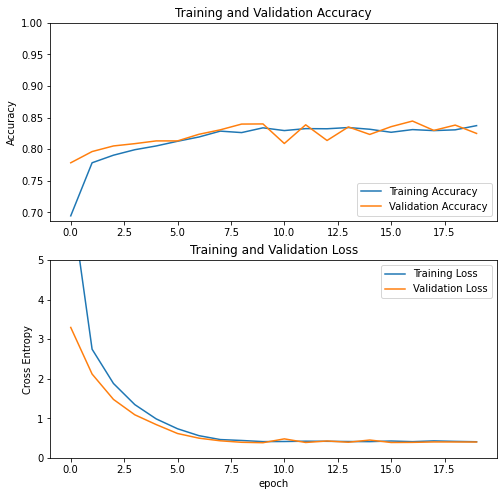

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 7/10 [====================>.........] - ETA: 0s - loss: 0.5630 - accuracy: 0.8092

Cleanup called...
Cleanup called...


10/10 [==============================] - 2s 20ms/step - loss: 0.5718 - accuracy: 0.8126
[0.571788489818573, 0.8125746250152588]


In [66]:
train_model_feature_extraction(0.001,20)

In [73]:
def train_model_fine_tuning(lr,epochs):
    pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(image_size,image_size,3),
                   #pooling='avg',
                   weights='imagenet')
    print("Number of layers in the base model: ", len(pretrained_model.layers))

    
    pretrained_model.summary()
    VGG19_model_frozen = Sequential()
    pretrained_model.trainable = True
    for layer in pretrained_model.layers[:7]:
        layer.trainable = False


    #for layer in pretrained_model.layers[:-1]: # go through until last layer
        #resnet_model.add(layer)


    #resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
    VGG19_model_frozen.add(pretrained_model)
    #resnet_model.add(tf.keras.layers.BatchNormalization())
    VGG19_model_frozen.add(Flatten())

    prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
    VGG19_model_frozen.add(prediction_layer)

    #model.compile(optimizer='adam', loss='categorical_crossentropy')
    for i, layer in enumerate(pretrained_model.layers):
            print(i, layer.name, "-", layer.trainable)
            
    opt = Adam(learning_rate=lr)
    VGG19_model_frozen.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    history=VGG19_model_frozen.fit(train_ds,epochs=epochs,batch_size=256,verbose=1,validation_data=val_ds)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,5.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    scores=VGG19_model_frozen.evaluate(test_dataset)
    print(scores)
    

Number of layers in the base model:  22
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooli

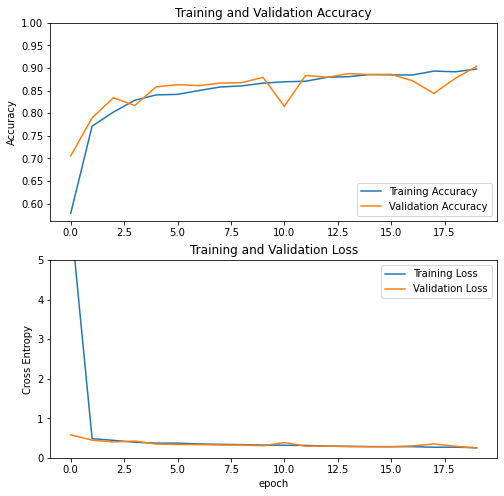

10/10 [==============================] - 0s 20ms/step - loss: 0.2552 - accuracy: 0.8961
[0.25524231791496277, 0.8961400985717773]


In [74]:
train_model_fine_tuning(0.001,20)